

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with GIF Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [2]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-27'] ['2016-12-26'] ['2016-12-21']
['2016-12-27']
'2016-12-27'


## get url

edit code here to combine both types of URL, encampments and concerns

In [3]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'// graffiti
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-27'


In [4]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [5]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [7]:
df = pd.read_csv(url)

In [8]:
df.shape

(49, 16)

#### wow, 5 days > 1000 reports

In [9]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6667051,12/27/2016 08:49:12 PM,NaN,12/27/2016 09:22:54 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"926 HOWARD ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.781044248628, -122.405731718922)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5863443f3da153f1b6e8f89c/report.jpg
1,6667012,12/27/2016 08:21:03 PM,NaN,12/27/2016 08:22:10 PM,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of LAUSSAT ST and BUCHANAN ST,5,Mint Hill,"(37.7720588486795, -122.427064006334)",Voice In,NaN
2,6666795,12/27/2016 06:03:37 PM,NaN,12/27/2016 06:41:20 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1941 HARRISON ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.76654276882, -122.413051590739)",Web Self Service,NaN


In [10]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [11]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6667051,2016-12-27 20:49:12,NaT,2016-12-27 21:22:54,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"926 HOWARD ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.781044248628, -122.405731718922)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5863443f3da153f1b6e8f89c/report.jpg
1,6667012,2016-12-27 20:21:03,NaT,2016-12-27 20:22:10,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of LAUSSAT ST and BUCHANAN ST,5,Mint Hill,"(37.7720588486795, -122.427064006334)",Voice In,NaN
2,6666795,2016-12-27 18:03:37,NaT,2016-12-27 18:41:20,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1941 HARRISON ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.76654276882, -122.413051590739)",Web Self Service,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=27.0, right=27.0
  'left=%s, right=%s') % (left, right))


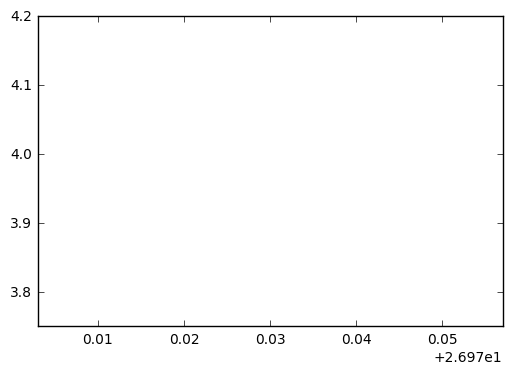

In [12]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=27.0, right=27.0
  'left=%s, right=%s') % (left, right))


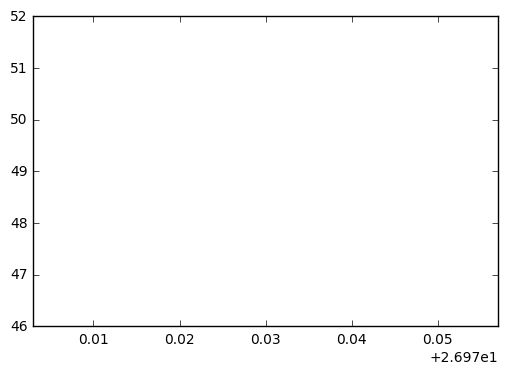

In [13]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


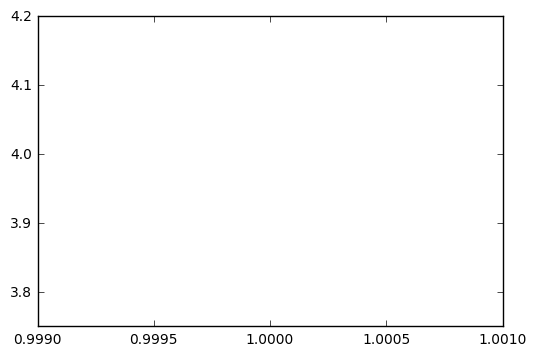

In [14]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [15]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [16]:

df['Request Details'].value_counts()


Encampment Cleanup    49
Name: Request Details, dtype: int64

In [17]:
df['Supervisor District'].value_counts().sort_index()



3      5
5      3
6     13
8      8
9     14
10     6
Name: Supervisor District, dtype: int64

In [18]:
df.Neighborhood.value_counts()

Mission                  16
South of Market           6
Mission Bay               4
Mission Dolores           3
Civic Center              3
Potrero Hill              2
Duboce Triangle           2
Financial District        2
Castro                    2
Hayes Valley              1
Haight Ashbury            1
Russian Hill              1
Fairmount                 1
Apparel City              1
North Beach               1
Chinatown                 1
Candlestick Point SRA     1
Mint Hill                 1
Name: Neighborhood, dtype: int64


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [19]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

# Mission

In [20]:
dfm= df[df.Neighborhood == 'Mission']
dfm = dfm[dfm['Media URL'].notnull()]['Media URL']
dfm = dfm.reset_index(drop=True)
dfm.to_csv('mission.txt', index=False)
dfm

0    http://mobile311.sfgov.org/media/san_francisco/report/photos/58630b043da153f1b6e8f30f/photo_20161227_164401.jpg
1    http://mobile311.sfgov.org/media/san_francisco/report/photos/58630ab83da153f1b6e8f2e5/photo_20161227_164325.jpg
2                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5863044f3da153f1b6e8f1e8/report.jpg
3    http://mobile311.sfgov.org/media/san_francisco/report/photos/5862fe543da153f1b6e8f0d5/photo_20161227_155038.jpg
4                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5862eb5a3da153f1b6e8ecb7/report.jpg
5                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5862bb433da153f1b6e8e437/report.jpg
6    http://mobile311.sfgov.org/media/san_francisco/report/photos/5862b5283da153f1b6e8e318/photo_20161227_103723.jpg
7                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5862a3933da153f1b6e8defe/report.jpg
8                   http://mobile311.sfgov.org/media/san_francis

In [21]:
print(dfm[0])

http://mobile311.sfgov.org/media/san_francisco/report/photos/58630b043da153f1b6e8f30f/photo_20161227_164401.jpg


# Soma


In [28]:
dfs= df[df.Neighborhood == 'South of Market']
dfs = dfs[dfs['Media URL'].notnull()]['Media URL']
dfs = dfs.reset_index(drop=True)
dfs.to_csv('soma.txt', index=False)
print(dfs[0])
dfs

IndexError: index out of bounds

# Supervisor District

## District 9, Hilary Ronan

In [29]:

dfr = df[df['Supervisor District']==9]
dfr = dfr[dfr['Media URL'].notnull()]['Media URL']
dfr = dfr.reset_index(drop=True)
dfr.to_csv('ronan.txt',index=False)


In [30]:
!cat ronan.txt

http://mobile311.sfgov.org/media/san_francisco/report/photos/586171a93da153f1b6e8cb4c/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/586171343da153f1b6e8cb38/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/58615ce13da153f1b6e8c8bc/report.jpg
http://mobile311.sfgov.org/media/san_francisco/report/photos/58613e073da153f1b6e8c543/photo_20161226_075752.jpg


## District 6, Jane Kim

In [31]:
dfk = df[df['Supervisor District']==6]
dfk = dfk[dfk['Media URL'].notnull()]['Media URL']
dfk = dfk.reset_index(drop=True)
dfk.to_csv('kim.txt',index=False)

In [32]:
!cat kim.txt

http://mobile311.sfgov.org/media/san_francisco/report/photos/586162763da153f1b6e8c959/report.jpg


# The whole City

In [33]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5861c6363da153f1b6e8d58e/photo_20161226_173634.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5861ac923da153f1b6e8d194/report.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5861a4e63da153f1b6e8d0f3/photo_20161226_151653.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58617d1d3da153f1b6e8cc01/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/586171a93da153f1b6e8cb4c/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/586171343da153f1b6e8cb38/report.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/586162763da153f1b6e8c959/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58615ce13da153f1b6e8c8bc/report.jpg
8                    http://mobile311.sfgov.org/media/sa

In [34]:
len(images)

12

In [35]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5861c6363da153f1b6e8d58e/photo_20161226_173634.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5861a4e63da153f1b6e8d0f3/photo_20161226_151653.jpg


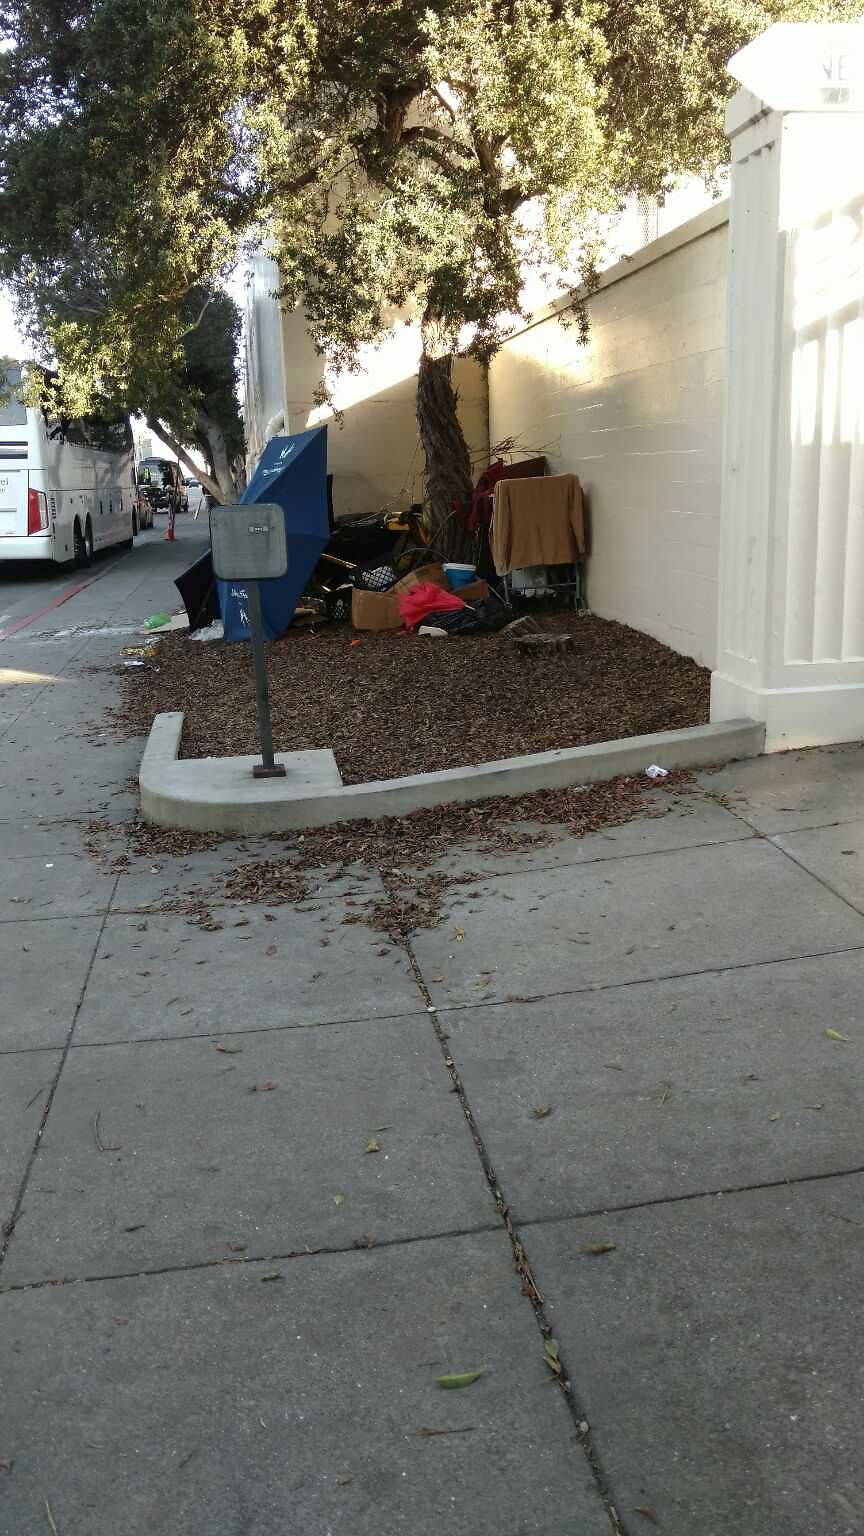

In [36]:
print(images[2])
Image(images[2])


In [37]:
!pwd

/home/gdillon/JupyterPractice/homeless_SF311


In [38]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [39]:
!yes| bash vidCreate.sh 

--2016-12-27 14:15:26--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5861c6363da153f1b6e8d58e/photo_20161226_173634.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80790 (79K) [image/jpeg]
Saving to: 'photo_20161226_173634.jpg'

photo_20161226_1736 100%[===================>]  78.90K  --.-KB/s    in 0.1s    

2016-12-27 14:15:26 (647 KB/s) - 'photo_20161226_173634.jpg' saved [80790/80790]

--2016-12-27 14:15:26--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5861ac923da153f1b6e8d194/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 148592 (145K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 145.11K  --.-KB/s    in 0.08s   

2016-12-27 14:15:27 (1.74 MB/s) - 'report.jpg' saved [14

In [ ]:
!ls -la
